In [1]:
from dlc_practical_prologue import generate_pair_sets
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F

from models import Baseline

train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)

print(train_input.size())
print(train_target.size())

torch.Size([1000, 2, 14, 14])
torch.Size([1000])


In [2]:
print(train_input.view(-1).size())

torch.Size([392000])


In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(392,2)
    
    def forward(self, x):
        x = self.fc1(x.view(1000,-1))
        x = F.relu(x)
        return x
    
m = Net()

y = m(train_input)
print(y.size())

torch.Size([1000, 2])


In [4]:
model = Baseline(generate_pair_sets)

mRes = model.train_and_test_rounds(10)

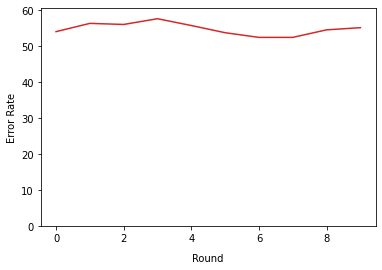

In [16]:
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange', 'tab:purple']


def plot_models_results_comparison(model_results, nb_rounds):
    plot_train_err_rates(model_results, nb_rounds)

def plot_model_result(model_result):
    pass


def plot_train_err_rates(model_results, nb_rounds):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.set_xlabel('Round', labelpad = nb_rounds)
    ax.set_ylabel('Error Rate')
    
    max_err_rate = max([max(mod_res.train_err_rates) for mod_res in model_results])
    ax.set_ylim([0,max_err_rate + 0.05*max_err_rate])
    
    for i, mod_res in enumerate(model_results):
        ax.plot(mod_res.train_err_rates, color = colors[i], label=mod_res.name)
    
plot_models_results_comparison([mRes],10)